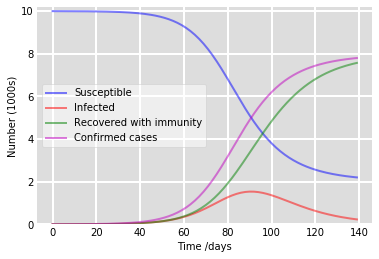

In [102]:
"Test portion"
from SIRModel import *
import matplotlib.pyplot as plt
import pandas as pd

sir = SIRModel(10000, 140)
sir.set_contact_rate(0.2)
sir.integrate()

S, I, R, t = sir.S, sir.I, sir.R, sir.t
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (I+R)/1000, 'm', alpha=0.5, lw=2, label="Confirmed cases")
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, 10.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [103]:
us_records = pd.read_csv("./data/US_counties_COVID19_health_weather_data.csv")
population = pd.read_csv("./data/co-est2019-alldata.csv", encoding="latin").set_index("CTYNAME")

In [104]:
us_records.head(15)

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,Illinois,17031,1,0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
5,2020-01-25,Orange,California,06059,1,0,no,no,33.702979,-117.761091,...,51.700000,51.02,51.10,49.786667,51.333333,50.14,47.18,45.513333,2020-03-19,2020-03-19
6,2020-01-25,Cook,Illinois,17031,1,0,no,no,41.840039,-87.816716,...,32.000000,30.80,28.81,25.953333,32.233333,29.98,25.96,24.000000,2020-03-20,2020-03-21
7,2020-01-25,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23
8,2020-01-26,Maricopa,Arizona,04013,1,0,no,no,33.348813,-112.491306,...,47.000000,46.76,46.04,46.760000,42.833333,39.94,38.72,37.553333,2020-03-30,2020-03-31
9,2020-01-26,Los Angeles,California,06037,1,0,no,no,34.358922,-118.217049,...,57.800000,56.84,58.10,57.200000,39.933333,36.46,32.72,33.026667,2020-03-19,2020-03-19


In [105]:
population.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
CTYNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,40,3,6,1,0,Alabama,4779736,4780125,4785437,4799069,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
Autauga County,50,3,6,1,1,Alabama,54571,54597,54773,55227,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
Baldwin County,50,3,6,1,3,Alabama,182265,182265,183112,186558,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
Barbour County,50,3,6,1,5,Alabama,27457,27455,27327,27341,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
Bibb County,50,3,6,1,7,Alabama,22915,22915,22870,22745,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [106]:
population.loc["Cuyahoga County"]

SUMLEV              50
REGION               2
DIVISION             3
STATE               39
COUNTY              35
                ...   
RNETMIG2015    -4.6718
RNETMIG2016   -4.52787
RNETMIG2017   -5.53378
RNETMIG2018   -4.99257
RNETMIG2019   -5.75099
Name: Cuyahoga County, Length: 163, dtype: object

In [107]:
counties = us_records.county.unique()
county_specific = {elem: pd.DataFrame for elem in counties}
for county in county_specific.keys():
    county_specific[county] = us_records[:][us_records.county == county].reset_index()

In [250]:
county_name = "Cobb"
county = county_specific[county_name]

7


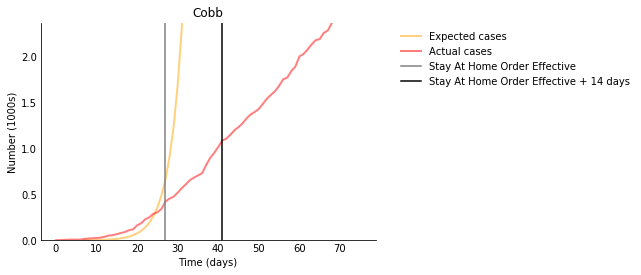

In [251]:
county_population = population.loc[county_name + " County"].POPESTIMATE2019
indexes_before_stay_at_home = len(county[county.stay_at_home_effective == 'no'].index)
buffer = indexes_before_stay_at_home - 20
county_pre = county[buffer:indexes_before_stay_at_home]
sir = SIRModel(county_population, len(county_pre.index))
sir.set_contact_rate(0.216)
sir.set_mean_recovery_rate(1./10)

def find_best_interval(min, interval, number, parameter_function):
    parameters = []
    minimum_cost = -1
    min_index = None
    for i in range(0, number):
        parameter_function(min + i * interval)
        sir.integrate()
        S, I, R, t = sir.S, sir.I, sir.R, sir.t
        parameters.append(min + i * interval)

        cost = sum(((I+R) ** 2) - (county_pre.cases ** 2))
        if minimum_cost == -1 or abs(cost) < minimum_cost:
            minimum_cost = abs(cost)
            min_index = i
    return parameters[min_index]

contact_rate = find_best_interval(0.04, 0.005, 100, sir.set_contact_rate)
contact_rate_accurate = find_best_interval(contact_rate - 0.003, 0.001, 5, sir.set_contact_rate)
mean_recovery_rate = find_best_interval(1./100,0.01, 50, sir.set_mean_recovery_rate)


model_sir = SIRModel(county_population, len(county.index))
model_sir.set_contact_rate(contact_rate_accurate)
model_sir.set_mean_recovery_rate(mean_recovery_rate)
model_sir.integrate()

stay_at_home_sir = SIRModel(county_population, len(county.index) - indexes_before_stay_at_home, R0=(model_sir.R[indexes_before_stay_at_home-buffer]), I0=model_sir.I[indexes_before_stay_at_home-buffer], contact_rate=0.18)
stay_at_home_sir.integrate()

S, I, R, t = model_sir.S, model_sir.I, model_sir.R, model_sir.t
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
ax = fig.add_subplot(111, axisbelow=True, title=county_name)
# ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
# ax.plot(t +buffer, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
# ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t+buffer, (I+R)/1000, 'orange', alpha=0.5, lw=2, label="Expected cases")
ax.plot(t, (county.cases/1000), 'red', alpha=0.5, lw=2, label="Actual cases")
# ax.plot(np.linspace(0, len(county.index) - indexes_before_stay_at_home-1, len(county.index) - indexes_before_stay_at_home) + indexes_before_stay_at_home, (stay_at_home_sir.I + stay_at_home_sir.R)/1000,  'b', alpha=0.5, lw=2, label="Expected cases stay at home")
stay_at_home_order_index = len(county[county.stay_at_home_effective == "no"].index)
ax.axvline(stay_at_home_order_index, label="Stay At Home Order Effective", color="grey")
ax.axvline(stay_at_home_order_index + 14, label="Stay At Home Order Effective + 14 days", color="black")
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, max(county.cases)/1000)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right'):
    ax.spines[spine].set_visible(False)
print(buffer)
plt.legend(bbox_to_anchor=(1.05, 1), frameon=False)
plt.show()

In [252]:
I+R


array([1.00000000e+00, 1.48208386e+00, 2.14002566e+00, 3.03797564e+00,
       4.26348429e+00, 5.93603818e+00, 8.21870831e+00, 1.13340467e+01,
       1.55857800e+01, 2.13884117e+01, 2.93076163e+01, 4.01153544e+01,
       5.48650657e+01, 7.49942441e+01, 1.02464338e+02, 1.39951513e+02,
       1.91106688e+02, 2.60909835e+02, 3.56152417e+02, 4.86093776e+02,
       6.63353138e+02, 9.05119944e+02, 1.23479254e+03, 1.68419026e+03,
       2.29652741e+03, 3.13038873e+03, 4.26500193e+03, 5.80715262e+03,
       7.90011029e+03, 1.07348864e+04, 1.45639494e+04, 1.97170426e+04,
       2.66177854e+04, 3.57980137e+04, 4.79040842e+04, 6.36856251e+04,
       8.39532944e+04, 1.09490435e+05, 1.40908759e+05, 1.78456056e+05,
       2.21816012e+05, 2.69975316e+05, 3.21243710e+05, 3.73470329e+05,
       4.24410387e+05, 4.72114916e+05, 5.15205786e+05, 5.52966021e+05,
       5.85266068e+05, 6.12400316e+05, 6.34909212e+05, 6.53433398e+05,
       6.68615182e+05, 6.81043053e+05, 6.91227469e+05, 6.99596045e+05,
      

In [253]:
us_records.sample(10)

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
82071,2020-04-23,Fayette,Ohio,39047,13,0,yes,yes,39.559883,-83.456092,...,42.000000,41.38,40.81,39.080000,40.133333,39.44,39.84,38.686667,2020-03-22,2020-03-23
15372,2020-03-27,Webb,Texas,48479,22,0,no,no,27.761117,-99.331527,...,69.700000,67.04,63.55,62.293333,64.933333,61.36,60.28,60.866667,2020-03-31,2020-04-02
20620,2020-03-30,Schuyler,New York,36097,2,0,yes,yes,42.393812,-76.875174,...,32.666667,33.18,31.69,31.726667,41.033333,38.38,35.99,34.706667,2020-03-20,2020-03-22
107834,2020-05-02,Fort Bend,Texas,48157,1133,27,yes,yes,29.527507,-95.770898,...,63.300000,62.02,63.96,63.573333,63.066667,61.74,63.38,61.920000,2020-03-31,2020-04-02
120517,2020-05-07,Greene,Iowa,19073,13,0,no,no,42.036247,-94.396859,...,40.466667,40.00,41.03,42.120000,38.100000,37.02,33.02,35.200000,NaN,NaN
91782,2020-04-27,Crisp,Georgia,13081,157,3,yes,yes,31.922935,-83.768067,...,56.000000,57.20,57.74,57.920000,45.066667,50.10,51.89,52.313333,2020-04-02,2020-04-03
14454,2020-03-27,Assumption,Louisiana,22007,8,0,yes,yes,29.900783,-91.062590,...,70.033333,69.10,67.22,66.273333,NaN,NaN,NaN,NaN,2020-03-22,2020-03-23
82884,2020-04-23,Stevens,Washington,53065,9,1,yes,yes,48.399106,-117.855174,...,31.633333,30.98,30.15,31.893333,36.666667,36.60,34.63,33.126667,2020-03-23,2020-03-23
125075,2020-05-08,Morris,Texas,48343,9,0,yes,yes,33.113473,-94.732645,...,55.433333,52.98,57.92,NaN,53.166667,52.06,56.11,NaN,2020-03-31,2020-04-02
86377,2020-04-25,Fayette,Illinois,17051,16,2,yes,yes,39.000195,-89.024139,...,47.733333,47.84,49.02,47.486667,50.566667,49.72,47.01,45.000000,2020-03-20,2020-03-21


In [254]:
from sklearn.metrics import r2_score
sir.set_contact_rate(contact_rate_accurate)
sir.set_mean_recovery_rate(mean_recovery_rate)
sir.integrate()
r2_score((county_pre.cases/1000), (sir.I+sir.R)/1000)


0.6470794179792516

In [255]:
r2_score(county.cases[buffer:]/1000, (I+R)[:-buffer]/1000)

-226638.13100280825